# 1.작업형 1유형 (3문항)
- 데이터 탐색
- 데이터 전처리 

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [210]:
# 데이터 불러오고 기본정보 확인
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/titanic.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

<Axes: xlabel='Sex', ylabel='count'>

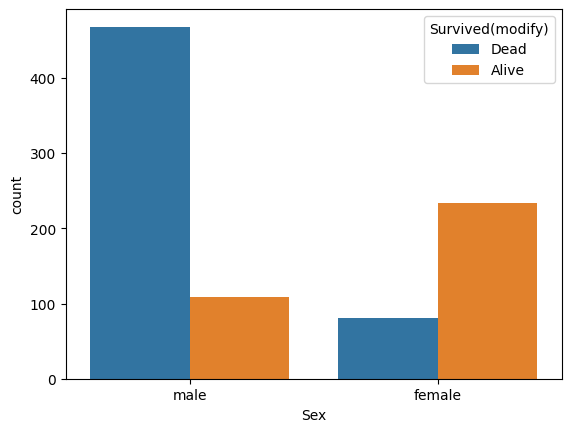

In [211]:
# 데이터 시각화 
df['Survived'].value_counts() # 생존 , 사망 수 확인 
# 생존 = 1 , 사망 =0 을 범주형 변수로 변환  
df['Survived(modify)'] = df['Survived'].replace([0,1],['Dead','Alive'])
sns.countplot(data=df, x='Sex', hue='Survived(modify)')


In [212]:
# 데이터 전처리 
df.isna().sum() # 각 컬럼 결측치 개수 확인 
# df.info() 로도 가능 
# Age , Cabin, Embark에 각 결측치가 존재


PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Survived(modify)      0
dtype: int64

In [213]:
# Age , Cabin은 결측치가 많으니 삭제 
df_dropna = df.copy()
df_dropna= df_dropna.drop(columns=['Age', 'Cabin'])
df_dropna.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            2
Survived(modify)    0
dtype: int64

In [214]:
# 결측치가 2개밖에 없는 Embarked 는 결측치가 있는 행 제거 
df_dropna2 = df_dropna.dropna()
df_dropna2.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Survived(modify)    0
dtype: int64

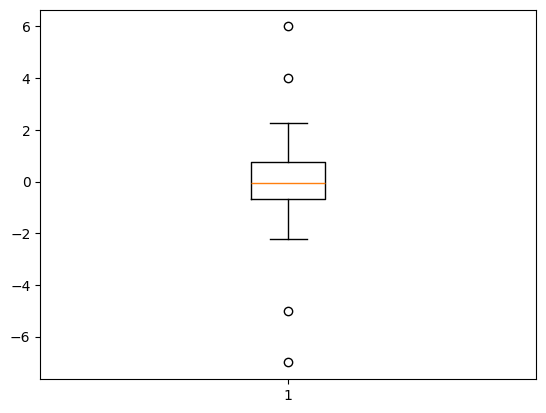

IQR: 1.4152964737737417
[ 4.  6. -7. -5.]


In [215]:
# 이상치 처리 
data = np.random.randn(50)
data= np.concatenate((data, np.array([4,6,-7,-5]))) # 정규분포를 따르는 50개 표본에 4개 이상치를 추가

# 이상치 검출 boxplot
plt.boxplot(data)
plt.show()

# 이상치만 출력

Q1,Q3 = np.percentile(data,[25,75])
IQR = Q3-Q1
print('IQR:',IQR)

outlier = data[(Q1-1.5*IQR>data) | (Q3 +1.5*IQR<data)]
print(outlier)



In [216]:
# 중복값 처리 
df = pd.DataFrame({'group':['A','B','C','B','B','C','A','C','A','B'], 'test_1':np.random.randn(10),'test_2':np.random.randn(10)})
print(df)

df.loc[[1,4],['test_1','test_2']] =0.5
print(df)# 중복값 데이터  

print(df[df.duplicated()])# 중복 데이터 위치 확인 
df.drop_duplicates(inplace=True) # 중복값 데이터 행 전체 제거 

print(df)


  group    test_1    test_2
0     A  0.981527  1.193176
1     B  0.497305 -0.004861
2     C -0.846399 -0.253714
3     B -0.227868  0.706453
4     B -0.011200 -0.253973
5     C -0.291514 -0.060208
6     A  0.809353  0.654779
7     C  0.254915 -1.322009
8     A  1.213826  0.635127
9     B -1.067179 -1.063160
  group    test_1    test_2
0     A  0.981527  1.193176
1     B  0.500000  0.500000
2     C -0.846399 -0.253714
3     B -0.227868  0.706453
4     B  0.500000  0.500000
5     C -0.291514 -0.060208
6     A  0.809353  0.654779
7     C  0.254915 -1.322009
8     A  1.213826  0.635127
9     B -1.067179 -1.063160
  group  test_1  test_2
4     B     0.5     0.5
  group    test_1    test_2
0     A  0.981527  1.193176
1     B  0.500000  0.500000
2     C -0.846399 -0.253714
3     B -0.227868  0.706453
5     C -0.291514 -0.060208
6     A  0.809353  0.654779
7     C  0.254915 -1.322009
8     A  1.213826  0.635127
9     B -1.067179 -1.063160


In [217]:
from sklearn.preprocessing import LabelEncoder
# 데이터 변환 (라벨인코더)
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')
le = LabelEncoder()
# species 행에 해당하는 데이터들을 연속형 변수(라벨인코더)로 변환하시오
df['species'] = le.fit_transform(df['species'])

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [218]:
# 원-핫 인코더 사용 

df_iris = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')
df_iris = pd.get_dummies(df_iris, columns=['species'], drop_first=True)

print(df_iris)


     sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0             5.1          3.5           1.4          0.2               False   
1             4.9          3.0           1.4          0.2               False   
2             4.7          3.2           1.3          0.2               False   
3             4.6          3.1           1.5          0.2               False   
4             5.0          3.6           1.4          0.2               False   
..            ...          ...           ...          ...                 ...   
145           6.7          3.0           5.2          2.3               False   
146           6.3          2.5           5.0          1.9               False   
147           6.5          3.0           5.2          2.0               False   
148           6.2          3.4           5.4          2.3               False   
149           5.9          3.0           5.1          1.8               False   

     species_virginica  
0 

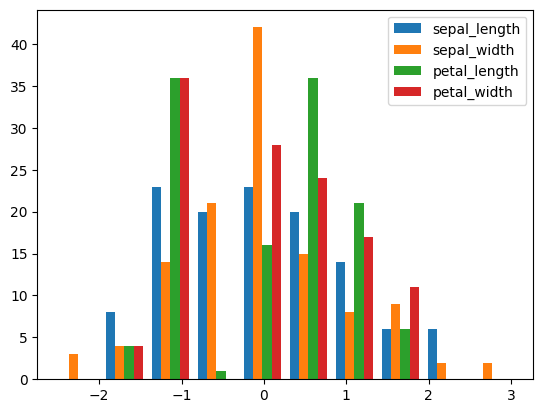

In [219]:
# 데이터 표준화 (standard scaler 정규분포화 )
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df_iris = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')

# 데이터 분할
target = 'species'
x = df_iris.drop(columns=target)
y = df_iris[target]
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,stratify=y)

# 데이터 표준화 
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
plt.hist(train_x)
plt.legend(['sepal_length','sepal_width','petal_length','petal_width'])



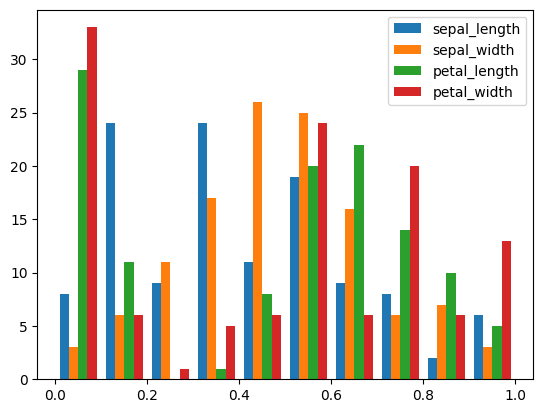

In [220]:
# 데이터 표준화 (Minmax Scaler 최대 최소분포화 )
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
df_iris = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/iris.csv')

# 데이터 분할
target = 'species'
x = df_iris.drop(columns=target)
y = df_iris[target]
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,stratify=y)

# 데이터 표준화 
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
plt.hist(train_x)
plt.legend(['sepal_length','sepal_width','petal_length','petal_width'])



In [221]:
# 데이터 평활화  

# 시계열 데이터를 받아온다면 시행해보자 

# 2. 작업형 2유형 (1문항)
- 데이터 분석 절차
- 데이터 분석 모델 설계계

In [222]:
# 데이터 불러오고 기본정보 확인
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/Bigdata_python/master/bigdata_csvfile/titanic.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [223]:
# 데이터 전처리 (불필요한 컬럼 제거, 결측값 대체, 라벨 인코딩)
df = df.drop(columns=['PassengerId','Cabin','Name','Ticket'])
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

le = LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


C:\Users\yee77\AppData\Local\Temp\ipykernel_19836\357190917.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)
C:\Users\yee77\AppData\Local\Temp\ipykernel_19836\357190917.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [224]:
# 데이터 분할
target = ['Survived']
x = df.drop(columns=target)
y = df[target]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y)
print(x)
print(y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
888       3    0  24.0      1      2  23.4500         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[891 rows x 7 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [225]:
# 데이터 분석 (분류 문제)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # 서포트 벡터머신 classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# 랜덤포레스트 모델 
rfc =RandomForestClassifier(n_estimators= 120, max_depth=20, random_state=2024)
rfc.fit(x_train,y_train)

# 로지스틱 회귀 모델 로드 
# lr = LogisticRegression()

# K-NN 모델 로드 
# knn = KNeighborsClassifier()

# 서포트 벡터 머신 (분류)
# svc = SVC(kernel='rbf')

# 의사결정나무 모델 로드 
# dtc = DecisionTreeClassifier()

y_pred = rfc.predict(x_test)


# 모델 성능평가 
score = accuracy_score(y_test,y_pred)
print('accuracy_score:',score)
F1_score = f1_score(y_test, y_pred , average='micro')
print('f1_score:',F1_score)
# 혼동행렬 출력 
print(confusion_matrix(y_test,y_pred))


accuracy_score: 0.8435754189944135
f1_score: 0.8435754189944135
[[96 14]
 [14 55]]


c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [226]:
# 데이터 분석 (회귀) 문제
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.svm import SVR # SVM Regressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# 평가지표 
from sklearn.metrics import mean_absolute_error , mean_squared_error # MAE , MSE 
# 시각화 라이브러리 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 데이터 탐색
df = pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/master/bigdata_csvfile/advertising.csv')
# print(df.info())
# print(df.head())

# 상관관계 분석
corr =df.corr(method='pearson') # 피어슨 상관분석 
print(corr)
print()
# 단순 선형 회귀 모델 로드 
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

# 모델 성능 평가 
r2 = r2_score(y_test, y_pred)
print('r2:',r2)
mae = mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse = mean_squared_error(y_test,y_pred)
print('mse:',mse)
print()

# SVM (회귀) 모델 로드 
svr =SVR(kernel='poly') # kernel: 커널함수 선택('linear','sigmoid','rbf','poly')
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

# 모델 성능 평가 
r2 = r2_score(y_test, y_pred)
print('r2:',r2)
mae = mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse = mean_squared_error(y_test,y_pred)
print('mse:',mse)
print()

# 의사결정나무 (회귀) 모델 로드
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

# 모델 성능 평가 
r2 = r2_score(y_test, y_pred)
print('r2:',r2)
mae = mean_absolute_error(y_test,y_pred)
print('mae:',mae)
mse = mean_squared_error(y_test,y_pred)
print('mse:',mse)

# # 모델 성능 평가 
# r2 = r2_score(y_test, y_pred)
# print('r2:',r2)
# mae = mean_absolute_error(y_test,y_pred)
# print('mae:',mae)
# mse = mean_squared_error(y_test,y_pred)
# print('mse:',mse)


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

r2: 0.38001611710551453
mae: 0.2979500588461554
mse: 0.1468642573942494

r2: -0.1689140530419273
mae: 0.38868284447146223
mse: 0.2768970276392194

r2: 0.05271960547504029
mae: 0.22895716945996275
mse: 0.2243955617628802


c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yee77\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._

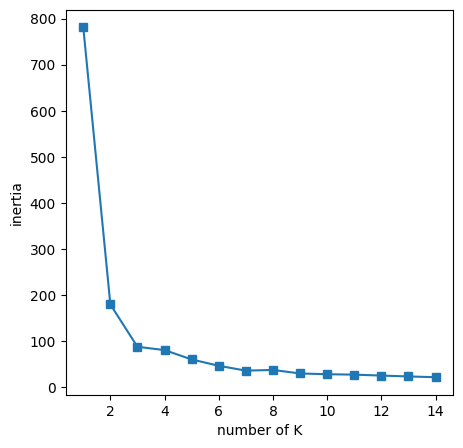

In [229]:
# 비지도학습 (군집분석)
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
df =pd.read_csv('https://raw.githubusercontent.com/JEunJin/BigData_python/master/bigdata_csvfile/iris.csv')
print(df.info())
print(df.head())

# 데이터 전처리(라벨링)

le =LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# K-means 클러스터링 모델 
cluster = KMeans(n_clusters=3, n_init=10, max_iter=500,random_state=2024,algorithm='lloyd')

cluster.fit(df)
y_pred = cluster.predict(df)

# 군집분석 성능평가 및 시각화 

scope= range(1,15)
inertias=[]

for i in scope: # K-means 의 클러스터 개수 별 성능을 평가하기 위한 지표표
    model = KMeans(n_clusters=i)
    model.fit(df)
    inertias.append(model.inertia_) # inertia 가 무슨 의미일까??

plt.figure(figsize=(5,5))
plt.plot(scope, inertias,'-s')
plt.xlabel('number of K')
plt.ylabel('inertia')
plt.show()



In [ ]:
# A-priori 알고리즘 연관성 분석 

# 3. 작업형 3유형 (6문항)
- 가설검정
-